# MK Real Estate-Price Prediction


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("housingdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    482 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    472
1     34
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,482.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.698900,22.532806
std,8.720192,23.388876,6.835896,0.250605,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.174825,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.037500,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.395000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

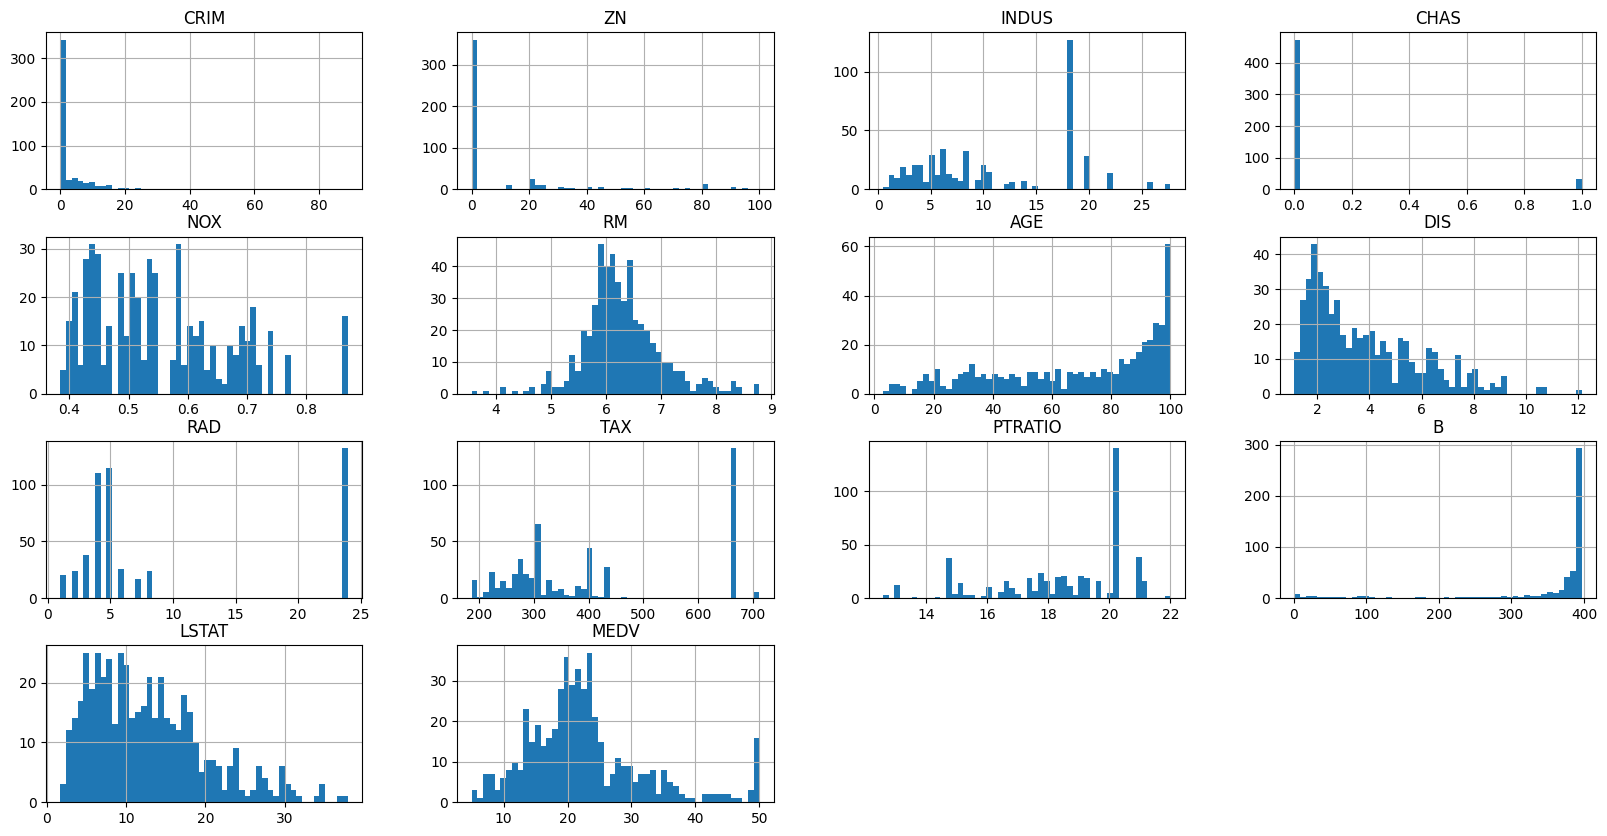

In [9]:
housing.hist(bins=50,figsize=(20,10))

# Train-Test Splitting

In [10]:
import numpy as np

# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_Size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_Size]
#     train_indices=shuffled[test_set_Size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_Set=split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set={len(train_set)}\nRows in test set {len(test_Set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [14]:
print(f"Rows in train set={len(train_set)}\nRows in test set {len(test_set)}")

Rows in train set=404
Rows in test set 102


# DISTRIBUTING DATA EQUALLY BTW TEST AND TRAIN SET

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit 
splt=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) 
for train_index,test_index in splt.split(housing,housing['CHAS']): 
    strat_train_set=housing.loc[train_index] 
    strat_test_set=housing.loc[test_index]

In [16]:
strat_train_set['CHAS'].value_counts()

0    377
1     27
Name: CHAS, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
housing=strat_train_set.copy()

# CORRELATION

In [19]:
housing_corr=housing.corr()

In [20]:
housing_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
LSTAT     -0.735043
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

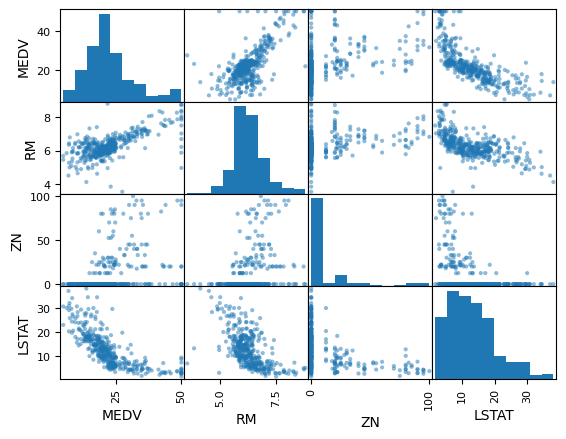

In [21]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes])


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

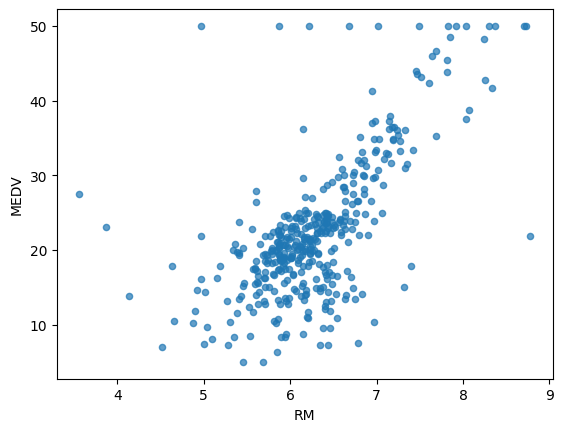

In [22]:
housing.plot(kind="scatter",x="RM",y='MEDV',alpha=.7)

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

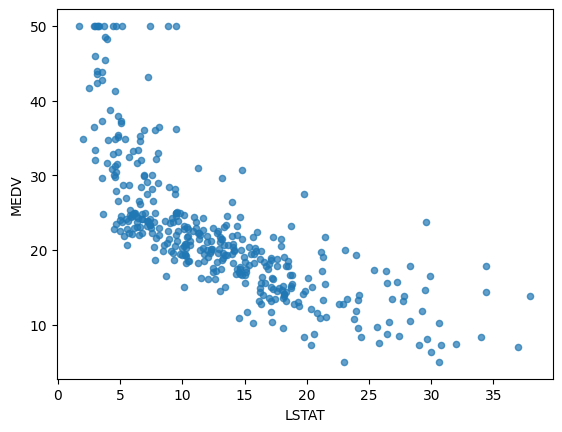

In [23]:
housing.plot(kind="scatter",x="LSTAT",y='MEDV',alpha=.7)

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 425 to 392
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     391 non-null    float64
 1   ZN       386 non-null    float64
 2   INDUS    388 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      390 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    384 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


# Combining attributes

In [25]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,17.8,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


In [27]:
housing_corr=housing.corr()
housing_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
TAXRM     -0.520217
LSTAT     -0.735043
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

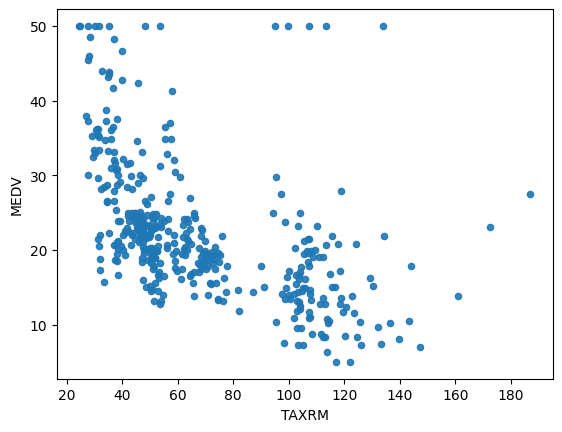

In [28]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=.9)

In [29]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,391.000000,386.000000,388.000000,404.000000,404.000000,404.000000,390.000000,404.000000,404.000000,404.000000,404.000000,404.000000,384.000000,404.000000,404.000000
mean,3.813349,10.866580,11.287552,0.066832,0.557777,6.280760,69.593590,3.745757,9.745050,411.539604,18.489109,353.730421,12.878047,22.498762,67.253766
std,9.325328,23.017096,6.802350,0.250040,0.116376,0.702466,27.609431,2.095471,8.723025,168.190814,2.135190,95.032131,7.234129,9.273689,31.115760
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.089470,0.000000,5.190000,0.000000,0.453000,5.878750,46.400000,2.042200,4.000000,283.250000,17.400000,374.650000,7.092500,16.775000,44.801475
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.730000,21.000000,55.243423
75%,3.675945,12.500000,18.100000,0.000000,0.625750,6.620500,94.250000,5.100400,24.000000,666.000000,20.200000,395.945000,17.112500,25.000000,98.317507
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [30]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

# Missing attributes

In [31]:
# To care of missing vattributes,you have three options
#  1. get rid of the missing data points = housing.dropna(subset=['RM'])
#  2. get rid of the whole attributes = housing.drop("RM",axis=1) NO RM COLOUMN AND ORIGINAL REMAINS UNCHANGED
#  3. set the value to some(0,mean,median)

In [32]:
# 3 computing medians for option 3
# median=housing['LSTAT'].median() 

In [33]:
# median

In [34]:
# housing['LSTAT'].fillna(median)

# sklearn method for missing attributes

In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.83920e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.77500e+01, 3.10730e+00, 5.00000e+00, 3.41000e+02,
       1.91000e+01, 3.90975e+02, 1.17300e+01])

In [37]:
X=imputer.transform(housing)

In [38]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.699779,10.382426,11.232599,0.066832,0.557777,6.280760,69.876238,3.745757,9.745050,411.539604,18.489109,353.730421,12.821213
std,9.194859,22.608913,6.671452,0.250040,0.116376,0.702466,27.166717,2.095471,8.723025,168.190814,2.135190,95.032131,7.056745
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091487,0.000000,5.725000,0.000000,0.453000,5.878750,47.350000,2.042200,4.000000,283.250000,17.400000,374.650000,7.215000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.730000
75%,3.489463,0.000000,18.100000,0.000000,0.625750,6.620500,94.025000,5.100400,24.000000,666.000000,20.200000,395.945000,16.910000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

In [40]:
# Primarily,three types of object
# 1.Estimators- Itestimates some parameter based on a dataset. 
#               Eg.imputer.It has a dit and transform method.
#               FIT method-It fits the data and evaluate some internal parameter.
# 2.Transformers-Transform method takes input and returs the output based on the learnings and fit().
#                It has a convenience function called fit_transform() whoch fit and transform the data.
# 3.Predictors-LinearRegression model is n example of predictor.
#              fit() and predict() are two common function.
#              It also gives score() function which will evaluate predictions.

# Features scaling

In [41]:
# Primarily, there are two types of features scaling
# 1.Min-Max scaling(Normalization)
#   (value-min)/(max-min)
#   sklearn provides a class called MinMaxScalar for this
# 2. Standardization
#   (value-mean)/std
#    sklearn provides a class called Standard Scalar for this (makes variance=1)

# Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    #.....
    ('std_scalar',StandardScaler()),
])

In [43]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for MK Real Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [46]:
some_data=housing.iloc[:5]

In [47]:
some_labels=housing_labels.iloc[:5]

In [48]:
prepared_data=my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([ 8.544, 22.788, 27.359, 18.031, 16.407])

In [50]:
list(some_labels)

[8.3, 23.1, 26.6, 17.8, 14.1]

# Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)

In [52]:
lin_rmse

1.3430516511377222

# Using better evaluation technique- Cross validation

In [53]:
# 1 2 3 4 5 6 78 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_Score=np.sqrt(-scores)

In [54]:
rmse_Score

array([5.08473183, 3.74088573, 2.82379195, 3.26755534, 6.43943948,
       3.14652935, 2.95447528, 3.57173494, 2.88356251, 2.95882197])

In [55]:
def print_scores(scores):
    print('Scores:',scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [56]:
print_scores(rmse_Score)

Scores: [5.08473183 3.74088573 2.82379195 3.26755534 6.43943948 3.14652935
 2.95447528 3.57173494 2.88356251 2.95882197]
Mean: 3.6871528394145168
Standard deviation: 1.116749067313805


In [57]:
from joblib import dump, load
>>> dump(model, 'MK.joblib') 
#SAVING A MODEL

['MK.joblib']

# Testing the data on test data

In [58]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions= model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)

In [59]:
final_rmse=np.sqrt(final_mse)

In [60]:
final_rmse

2.6749137057732018

In [61]:
print(final_predictions,list(y_test))

[33.655  9.478 23.844 29.882 18.005 14.804 19.655 15.07  35.206 31.1
 19.35  10.681 19.465 11.433 20.821 11.946 34.672 14.325 21.842 26.984
 19.52  16.787  9.446 25.51  19.404 23.762 17.822 26.385  8.291 33.934
 21.99  20.674 20.341 12.365 20.192 17.037 33.2   24.936 21.234 20.398
 20.123 46.055 19.795 21.738 19.714 23.82  34.601 20.704 20.528 20.049
 21.97  14.691 24.44  19.795 26.031 22.65  47.191 28.93  19.427 20.363
 27.698  8.59  20.949 44.271 14.884 34.185 48.418 18.017 20.627 32.21
 46.974 23.37  27.885 23.26  46.975 13.578 19.711 22.864 23.125 23.962
 21.937 21.772 13.7   23.123 21.05  21.008 12.646 22.666 21.964 22.756
 18.522 25.343 12.811 23.1   16.633 34.425 19.816 31.023 13.891 26.055
 22.307 22.574] [32.7, 13.1, 28.7, 26.7, 14.4, 15.6, 19.4, 12.6, 33.3, 32.4, 23.1, 13.8, 22.6, 11.9, 21.1, 11.3, 35.4, 13.5, 21.0, 27.5, 19.2, 19.5, 10.2, 29.4, 18.6, 24.8, 15.2, 24.4, 8.8, 30.3, 22.0, 20.6, 23.1, 13.3, 23.8, 13.8, 33.8, 24.7, 19.4, 20.9, 22.5, 48.8, 22.7, 23.4, 19.5, 26.4, 3

# OUTPUT FROM MODEL


In [62]:
from joblib import dump, load
model=load('MK.joblib')
import numpy as np

In [63]:
prepared_data[3]

array([-0.36821678, -0.45978766, -0.19999414, -0.26761547, -0.11853054,
       -0.52275071,  0.29019058,  0.12081107, -0.6594241 , -0.64018327,
       -0.04178522,  0.38950425,  0.78160935])

In [64]:
input=np.array([[-0.36821678, -0.45978766, -0.19999414, -0.26761547, -0.11853054,
       6.52275071,  0.29019058,  0.12081107, -0.6594241 , -0.64018327,
       -0.04178522,  0.38950425,  0.78160935]])
model.predict(input)

array([33.929])

In [65]:
#print(model.coef_)

In [66]:
#print(model.intercept_)

In [67]:
from sklearn.metrics import r2_score

In [69]:
r2_score(final_predictions,y_test)

0.9006187062854217

SyntaxError: incomplete input (4144268672.py, line 1)